In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import pylab as pl
import datetime

In [2]:
''' Funcion que recibe 2 vectores de igual dimension, y la dimension de estos, y calcula la
    distancia Manhattan para estos'''
def calcular_distancia_manhattan(v1,v2,dim):
    dist=0
    for i in xrange(dim):
        dist += abs(v1[i] - v2[i])
    return dist

In [3]:
viajes = pd.read_csv("trip.csv")

In [23]:
estaciones = pd.read_csv("station.csv")
estaciones = estaciones[['id', 'lat', 'long']]
#estaciones.rename(columns={'lat': 'startLat', 'long': 'startLong'})

In [87]:
viajes_mergeado = pd.merge(viajes, estaciones, left_on = ['start_station_id'], right_on = ['id'])

In [97]:
viajes_mergeado2 = pd.merge(viajes_mergeado, estaciones, left_on = ['end_station_id'], right_on = ['id'])
viajes_mergeado2 = viajes_mergeado2.rename(columns={'lat_x': 'startLat', 'long_x': 'startLong', 'lat_y': 'endLat', 'long_y': 'endLong'})

In [101]:
viajes_mergeado2['distancia'] = calcular_distancia_manhattan([viajes_mergeado2['startLong'], viajes_mergeado2['startLat']],
                                                            [viajes_mergeado2['endLong'], viajes_mergeado2['endLat']],
                                                            2)


,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,id_y,startLat,startLong,id,endLat,endLong,distancia
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,66,37.774814,-122.418954,66,37.774814,-122.418954,0.000000
358290,58210,67563,10/14/2013 21:52,Powell at Post (Union Square),71,10/15/2013 16:38,Powell at Post (Union Square),71,612,Customer,94102,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358291,58215,65773,10/14/2013 21:55,Powell at Post (Union Square),71,10/15/2013 16:11,Powell at Post (Union Square),71,567,Customer,94102,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358292,58226,65751,10/14/2013 22:23,Powell at Post (Union Square),71,10/15/2013 16:38,Powell at Post (Union Square),71,341,Customer,94102,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358293,58230,64829,10/14/2013 22:38,Powell at Post (Union Square),71,10/15/2013 16:38,Powell at Post (Union Square),71,602,Customer,94102,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358294,58667,24513,10/15/2013 9:27,Powell at Post (Union Square),71,10/15/2013 16:16,Powell at Post (Union Square),71,465,Customer,94108,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358295,58668,24492,10/15/2013 9:27,Powell at Post (Union Square),71,10/15/2013 16:16,Powell at Post (Union Square),71,580,Customer,94108,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358296,59164,4646,10/15/2013 15:38,Powell at Post (Union Square),71,10/15/2013 16:56,Powell at Post (Union Square),71,410,Customer,NaN,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358297,60860,15832,10/16/2013 17:29,Powell at Post (Union Square),71,10/16/2013 21:53,Powell at Post (Union Square),71,563,Customer,NaN,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000
358289,57605,2427,10/14/2013 15:07,Powell at Post (Union Square),71,10/14/2013 15:48,Powell at Post (Union Square),71,602,Customer,14052,71,37.788446,-122.408499,71,37.788446,-122.408499,0.000000


In [122]:
viajes_duracion_distancia = viajes_mergeado2[['duration', 'distancia']]
viajes_duracion_distancia = viajes_duracion_distancia[viajes_duracion_distancia['duration'] < 43200]
viajes_duracion_distancia

,duration,distancia
0,63,0.0
1,113,0.0
2,168,0.0
3,262,0.0
4,995,0.0
5,1397,0.0
6,134,0.0
7,140,0.0
8,182,0.0
9,481,0.0


In [123]:
vddg = viajes_duracion_distancia.groupby('distancia').mean()
vddg['dist'] = vddg.index
vddg

,duration,dist
distancia,,
0.000000,4609.746688,0.000000
0.000227,4302.118367,0.000227
0.001484,4455.387755,0.001484
0.001559,1844.975000,0.001559
0.002199,4723.393064,0.002199
0.002762,939.166172,0.002762
0.002841,1016.982301,0.002841
0.002881,1509.932432,0.002881
0.002916,2126.589552,0.002916


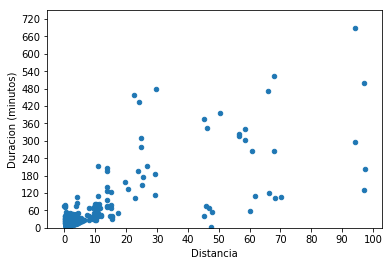

In [194]:
%matplotlib inline

vddg.plot.scatter(x='dist', y='duration')
plt.xlabel('Distancia')
plt.ylabel('Duracion (minutos)')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda y, _: '{}'.format(int(y)/60))) #Para darle formato a los valores de los ticks
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: '{}'.format(int(x*100))))
ax.yaxis.set_ticks(np.arange(0, 45000, 3600))
ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0,45000])

'''x = vddg[vddg['dist'] > 0]['dist'] 
y = vddg[vddg['dist'] > 0]['duration']
a, b = np.polyfit(np.log(x), y, 1)
yn = a * np.log(x) + b
plt.plot(x, yn)'''

plt.show()